# Clustering Exhibition

In [1]:
# Import packages used throughout
import matplotlib.pyplot as plt
import numpy as np

from from_scratch import gmm, kmeans
from sklearn import cluster, datasets, mixture

#%matplotlib qt

## Part 1: Symmetric Blobs

In [2]:
# Create 3D Blobs
features, targets = datasets.make_blobs(n_samples=400, n_features=3, centers=6, cluster_std=1.5)

### Section 1a: From Scratch

Means: [[ 7.78026827 -8.80259154  8.16704705]
 [ 8.44564885  6.07831259 -7.91704399]
 [ 7.70982702 -9.83742589 -9.81332053]
 [-2.47893451 -2.01586668 -9.46954018]
 [ 3.85014219  5.93544406 -0.34132916]
 [-2.51928716 -9.35210999 -4.39773363]]


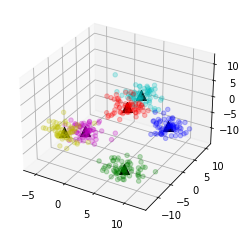

In [3]:
# KMeans
modelA = kmeans.KMeans(6)
modelA.fit(features.T)
meansA = modelA.means.T
print(f"Means: {meansA}")

## Visualize
ax = plt.axes(projection="3d")
for idx, color in enumerate(['r', 'b', 'g', 'm', 'c', 'y']):
    cluster_bools = targets == idx
    ax.scatter(features[cluster_bools,0], features[cluster_bools,1], features[cluster_bools,2], c = color, alpha = 0.25)
    ax.scatter(meansA[idx,0], meansA[idx, 1], meansA[idx, 2], c = 'k', marker = '^', s = 100)

Means: [[ 8.44884726  6.07602921 -7.91645872]
 [ 7.78026827 -8.80259154  8.16704705]
 [-2.51618809 -9.34042507 -4.40738056]
 [ 7.70979558 -9.83742789 -9.81329101]
 [ 3.8497361   5.93792098 -0.34678062]
 [-2.48191238 -2.00668051 -9.4743351 ]]
Covariances: [2.11463877 1.86474005 2.32920096 2.4775117  1.99416077 2.1858384 ]


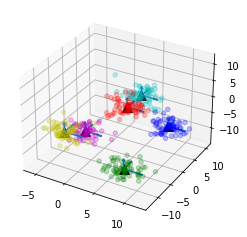

In [4]:
# GMM
modelA_GMM = gmm.GMM(6, "spherical")
modelA_GMM.fit(features.T)
meansA_GMM = modelA_GMM.means.T
covariancesA = modelA_GMM.covariances
stdA = np.sqrt(covariancesA)
print(f"Means: {meansA_GMM}")
print(f"Covariances: {covariancesA}")

## Visualize
ax = plt.axes(projection="3d")

x_unit = np.array([1, 0, 0])
y_unit = np.array([0, 1, 0])
z_unit = np.array([0, 0, 1])

for idx, color in enumerate(['r', 'b', 'g', 'm', 'c', 'y']):
    cluster_bools = targets == idx
    ax.scatter(features[cluster_bools,0], features[cluster_bools,1], features[cluster_bools,2], c = color, alpha = 0.25)
    ax.scatter(meansA_GMM[idx,0], meansA_GMM[idx, 1], meansA_GMM[idx, 2], c = 'k', marker = '^', s = 100)
    ax.quiver(meansA_GMM[idx,0], meansA_GMM[idx, 1], meansA_GMM[idx, 2], 
        2*stdA[idx]*x_unit, 2*stdA[idx]*y_unit, 2*stdA[idx]*z_unit)

### Section 1b: Sklearn

Means: [[ 7.70982702 -9.83742589 -9.81332053]
 [-2.51928716 -9.35210999 -4.39773363]
 [ 3.85014219  5.93544406 -0.34132916]
 [ 8.44564885  6.07831259 -7.91704399]
 [ 7.78026827 -8.80259154  8.16704705]
 [-2.47893451 -2.01586668 -9.46954018]]


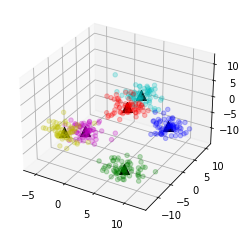

In [5]:
# KMeans
modelB = cluster.KMeans(n_clusters = 6, init = "k-means++", n_init = 1, algorithm = "full")
modelB.fit(features)
meansB = modelB.cluster_centers_
print(f"Means: {meansB}")

## Visualize
ax = plt.axes(projection="3d")
for idx, color in enumerate(['r', 'b', 'g', 'm', 'c', 'y']):
    cluster_bools = targets == idx
    ax.scatter(features[cluster_bools,0], features[cluster_bools,1], features[cluster_bools,2], c = color, alpha = 0.25)
    ax.scatter(meansB[idx,0], meansB[idx, 1], meansB[idx, 2], c = 'k', marker = '^', s = 100)

Means: [[ 7.70979543 -9.83742791 -9.81329089]
 [ 8.44883035  6.07603112 -7.91642967]
 [ 7.78026827 -8.80259154  8.16704705]
 [-2.5162201  -9.34058585 -4.40724331]
 [ 3.84971727  5.93791789 -0.34675088]
 [-2.48188219 -2.00682034 -9.47426435]]
Covariances: [2.47751309 2.11467891 1.86474105 2.32887485 1.99411949 2.18601071]


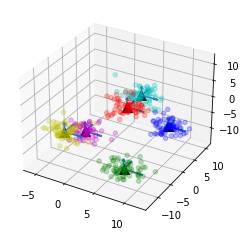

In [6]:
# GMM
modelB_GMM = mixture.GaussianMixture(n_components = 6, covariance_type = "spherical")
modelB_GMM.fit(features)
meansB_GMM = modelB_GMM.means_
covariancesB = modelB_GMM.covariances_
stdB = np.sqrt(covariancesB)
print(f"Means: {meansB_GMM}")
print(f"Covariances: {covariancesB}")

## Visualize
ax = plt.axes(projection="3d")

x_unit = np.array([1, 0, 0])
y_unit = np.array([0, 1, 0])
z_unit = np.array([0, 0, 1])

for idx, color in enumerate(['r', 'b', 'g', 'm', 'c', 'y']):
    cluster_bools = targets == idx
    ax.scatter(features[cluster_bools,0], features[cluster_bools,1], features[cluster_bools,2], c = color, alpha = 0.25)
    ax.scatter(meansB_GMM[idx,0], meansB_GMM[idx, 1], meansB_GMM[idx, 2], c = 'k', marker = '^', s = 100)
    ax.quiver(meansB_GMM[idx,0], meansB_GMM[idx, 1], meansB_GMM[idx, 2], 
        2*stdB[idx]*x_unit, 2*stdB[idx]*y_unit, 2*stdB[idx]*z_unit)